<a href="https://colab.research.google.com/github/u0sama/Exponential-Moving-Average-EMA-/blob/main/EMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#user input
Symbol = 'SPY'
Start = "2021-11-1"
To = "2022-1-14"
#Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
Granularity= "1d"
Fast=50
Slow=200

In [ ]:
%pip install yfinance
%pip install mpl_finance


     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 46.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd

import yfinance as yf
import numpy as np
import math
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt# get stock prices using yfinance library
plt.rcParams['figure.figsize'] = [16, 12]

plt.rc('font', size=14) 
df = yf.download(Symbol, start= Start,end= To, threads= False)

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df['Fast_EMA'] = df['Close'].ewm(span = Fast, adjust = False).mean()
df['Slow_EMA'] = df['Close'].ewm(span = Slow, adjust = False).mean()
df


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume,Fast_EMA,Slow_EMA
Date,,,,,,,,
2021-11-01,738095.0,460.299988,460.700012,458.200012,460.040009,48433600,460.040009,460.040009
2021-11-02,738096.0,460.220001,462.230011,460.079987,461.899994,48908400,460.112949,460.058516
2021-11-03,738097.0,461.299988,465.149994,460.829987,464.720001,52509800,460.293618,460.104899
2021-11-04,738098.0,465.359985,467.000000,464.989990,466.910004,52847100,460.553084,460.172611
2021-11-05,738099.0,469.279999,470.649994,466.920013,468.529999,66332200,460.865904,460.255769
2021-11-08,738102.0,469.700012,470.230011,468.200012,468.929993,50405200,461.182143,460.342080
2021-11-09,738103.0,469.320007,469.570007,465.880005,467.380005,51149100,461.425196,460.412109
2021-11-10,738104.0,465.579987,467.380005,462.040009,463.619995,69429700,461.511267,460.444028
2021-11-11,738105.0,465.209991,465.290009,463.750000,463.769989,34848500,461.599844,460.477123


In [ ]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [ ]:
levels = []
levelr = []
levelsp = []
levelre= []
a=1
b=1
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    
    levels.append((i,df['Low'][i]))
    levelsp.append((a,df['Low'][i]))
    a=a+1


  elif isResistance(df,i):
  
    levelr.append((i,df['High'][i]))
    levelre.append((b,df['High'][i]))
    b=b+1

In [ ]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()
  df['Fast_EMA'].plot(color = 'red', lw = 2.5, label="Fast EMA") 
  df['Slow_EMA'].plot(color = 'green', lw = 2.5,label="Slow EMA")

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='green', linestyle="dashed")
  #plt.text(max(df['Date']), df['Date'][level[0]], ' somelabel1')

    
  for level in levelr:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='red',linestyle="dashed")
    T= "Method1 Supports and Resistance of " + Symbol
    
    plt.title(T)
    plt.legend()

    
  fig.show()

Supports Points
1 462.0400085449219
2 460.25
3 451.1400146484375
4 456.6000061035156
 
 
Resistance Points
1 470.6499938964844
2 472.8699951171875
3 479.9800109863281


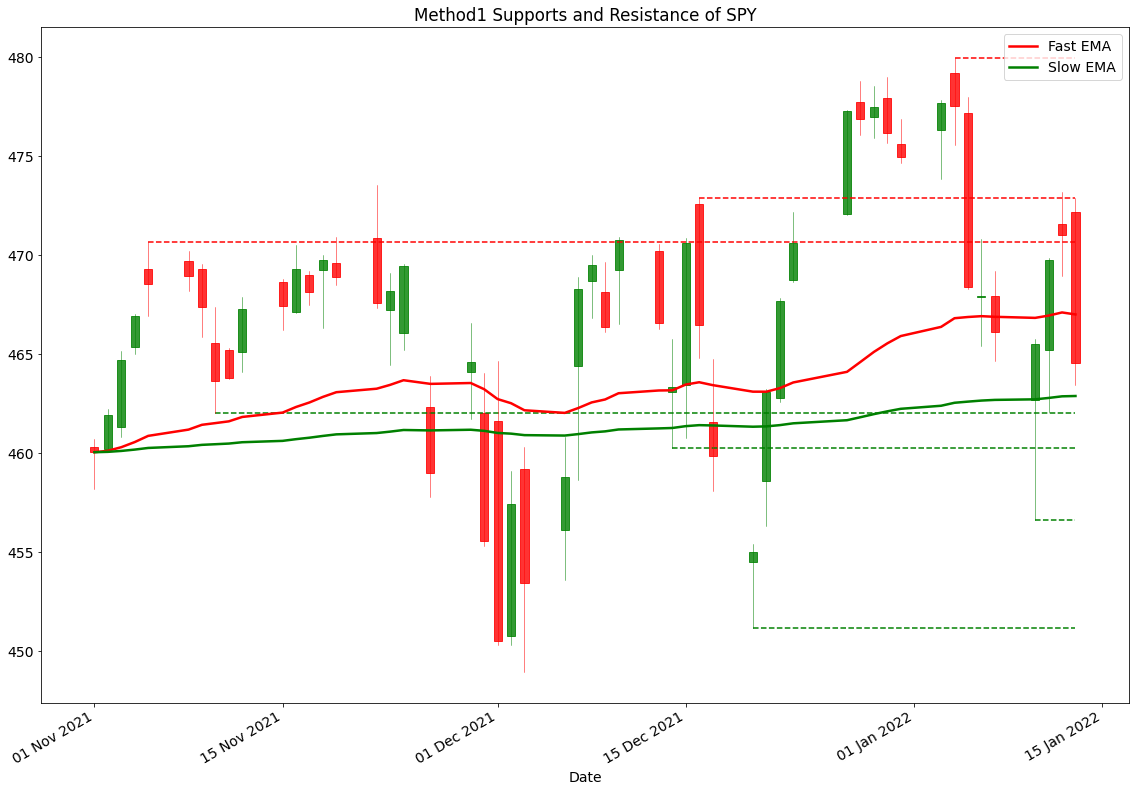

In [ ]:
print ("Supports Points")


for line in levelsp:
    print(*line)


print (" ") 
print (" ") 

print ("Resistance Points") 
for line1 in levelre:
    print(*line1)



plot_all()



Supports Points
1 462.0400085449219
2 448.9200134277344
 
 
Resistance Points
1 470.6499938964844
2 473.5400085449219
3 472.8699951171875
4 479.9800109863281


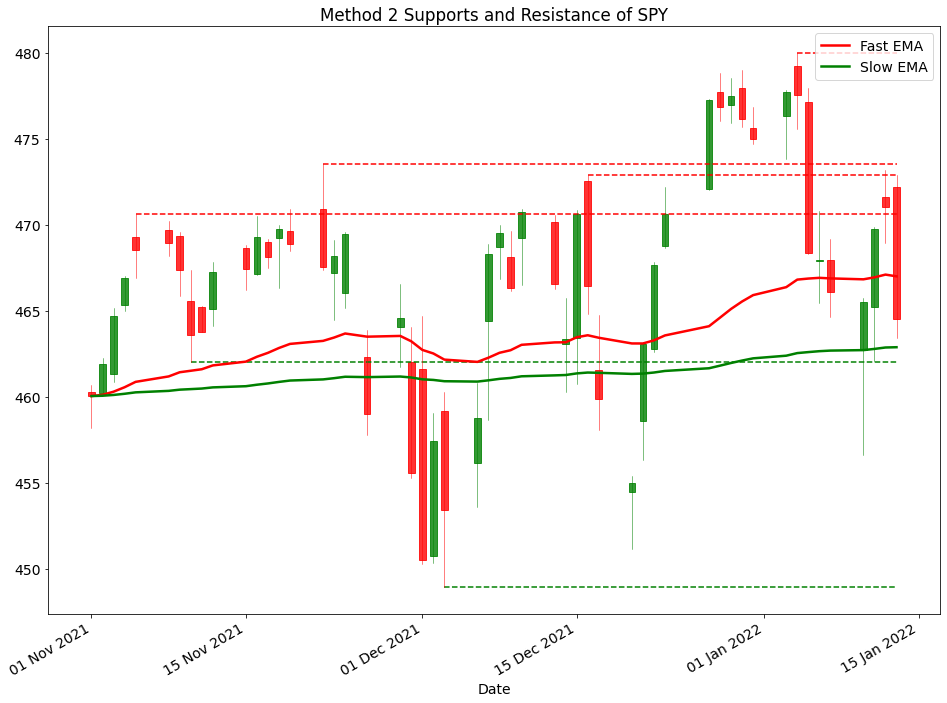

In [ ]:
def plot_all1(level1, level2, df):
    fig, ax = plt.subplots(figsize=(16, 12))
    candlestick_ohlc(ax,df.values,width=0.6, colorup='green', colordown='red', alpha=0.8)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    df['Fast_EMA'].plot(color = 'red', lw = 2.5, label="Fast EMA") 
    df['Slow_EMA'].plot(color = 'green', lw = 2.5,label="Slow EMA")
    for level in level1:
      plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='green', linestyle="dashed")
  #plt.text(max(df['Date']), df['Date'][level[0]], ' somelabel1')

    
    for level in level2:
      plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='red',linestyle="dashed")
   
   
  #plt.text(max(df['Date']), df['Date'][level[0]], ' somelabel1')

    
    
    T= "Method 2 Supports and Resistance of " + Symbol
    
    plt.title(T)
    plt.legend()

    fig.show()
def is_support(df,i):
  cond1 = df['Low'][i] < df['Low'][i-1] 
  cond2 = df['Low'][i] < df['Low'][i+1] 
  cond3 = df['Low'][i+1] < df['Low'][i+2] 
  cond4 = df['Low'][i-1] < df['Low'][i-2]
  return (cond1 and cond2 and cond3 and cond4)

def is_resistance(df,i):
  cond1 = df['High'][i] > df['High'][i-1] 
  cond2 = df['High'][i] > df['High'][i+1] 
  cond3 = df['High'][i+1] > df['High'][i+2] 
  cond4 = df['High'][i-1] > df['High'][i-2]
  return (cond1 and cond2 and cond3 and cond4)
def is_far_from_level(value, levels, df):
    ave =  np.mean(df['High'] - df['Low'])
    return np.sum([abs(value - level) < ave for _, level in levels]) == 0
#method 1: fractal candlestick pattern
def detect_level_method_1(df):
  levels = []
  for i in range(2,df.shape[0]-2):
    if is_support(df,i):
      l = df['Low'][i]
      if is_far_from_level(l, levels, df):
        levels.append((i,l))
    elif is_resistance(df,i):
      l = df['High'][i]
      if is_far_from_level(l, levels, df):
        levels.append((i,l))
  return levels

#method 2: window shifting method
def detect_level_method_2(df):
  levels = []

  max_list = []
  min_list = []
  for i in range(5, len(df)-5):
      high_range = df['High'][i-5:i+4]
      current_max = high_range.max()
      if current_max not in max_list:
          max_list = []
      max_list.append(current_max)
      if len(max_list) == 5 and is_far_from_level(current_max, levels, df):
          levels.append((high_range.idxmax(), current_max))
      
      low_range = df['Low'][i-5:i+5]
      current_min = low_range.min()
      if current_min not in min_list:
          min_list = []
      min_list.append(current_min)
      if len(min_list) == 5 and is_far_from_level(current_min, levels, df):
          levels.append((low_range.idxmin(), current_min))
  return levels

pivots = []
pivotse = []

pivotr = []
pivotre = []
a=1
b=1

max_list = []
min_list = []
for i in range(5, len(df)-5):
    high_range = df['High'][i-5:i+4]
    current_max = high_range.max()

    if current_max not in max_list:
        max_list = []
    max_list.append(current_max)
    if len(max_list) == 5 and is_far_from_level(current_max, pivots, df):
        pivotr.append((high_range.idxmax(), current_max))
        pivotre.append((a, current_max))
        a=a+1
    
    low_range = df['Low'][i-5:i+5]
    current_min = low_range.min()
    if current_min not in min_list:
        min_list = []
    min_list.append(current_min)
    if len(min_list) == 5 and is_far_from_level(current_min, pivots, df):
        pivots.append((low_range.idxmin(), current_min))
        pivotse.append((b, current_min))
        b=b+1

print ("Supports Points")


for line3 in pivotse:
    print(*line3)


print (" ") 
print (" ") 

print ("Resistance Points") 
for line4 in pivotre:
    print(*line4)
plot_all1(pivots, pivotr,df)